# SVR: Support Vector Regression

http://mcminis1.github.io/blog/2014/05/10/intuition-for-SVR/

Briefly: 

* SVR is fast way of interpolating data sets. 
* You could have expensive function you want to approximate over known domains. 
* Quick learner, and can be improved systematically. 
* It is a generalization of support vector machine to the regression problem.
* Can be labelled supervised learning algorithm.

Gaussian processes are particular form of SVM. Difference between them is choice of kernel and in the loss function. The kernel determines which vectors most strongly influences regression and forms of estimator. Loss function determines coefficients in regression.

Kernel and loss function totally determine form and accuracy of estimator.

Kernels: Different functions, each with hyperparameters to train.

Regularization: Matters as it helps preventing wild fluctuations by smoothing out prior.

What is SVR? Performs linear regression in higher (infinite) dimensional space. Each datapoint represents its own dimension. To evaluate kernel, resulting value gives coordinate of test point in dimension.

## Code

In [3]:
library(ggplot2)
library(tidyverse)
library(e1071)

In [8]:
dataset = read_csv("data/SVR/Position_Salaries.csv")
dataset = dataset[2:3]
dataset

Parsed with column specification:
cols(
  Position = col_character(),
  Level = col_integer(),
  Salary = col_integer()
)


Level,Salary
1,45000
2,50000
3,60000
4,80000
5,110000
6,150000
7,200000
8,300000
9,500000
10,1000000


In [12]:
# Type - regression, classification...
regressor <- svm(formula = Salary ~ .,
                 data=dataset,
                 type='eps-regression')
y_pred <- predict(regressor, data.frame(Level = 6.5))
y_pred

1 
177861.1

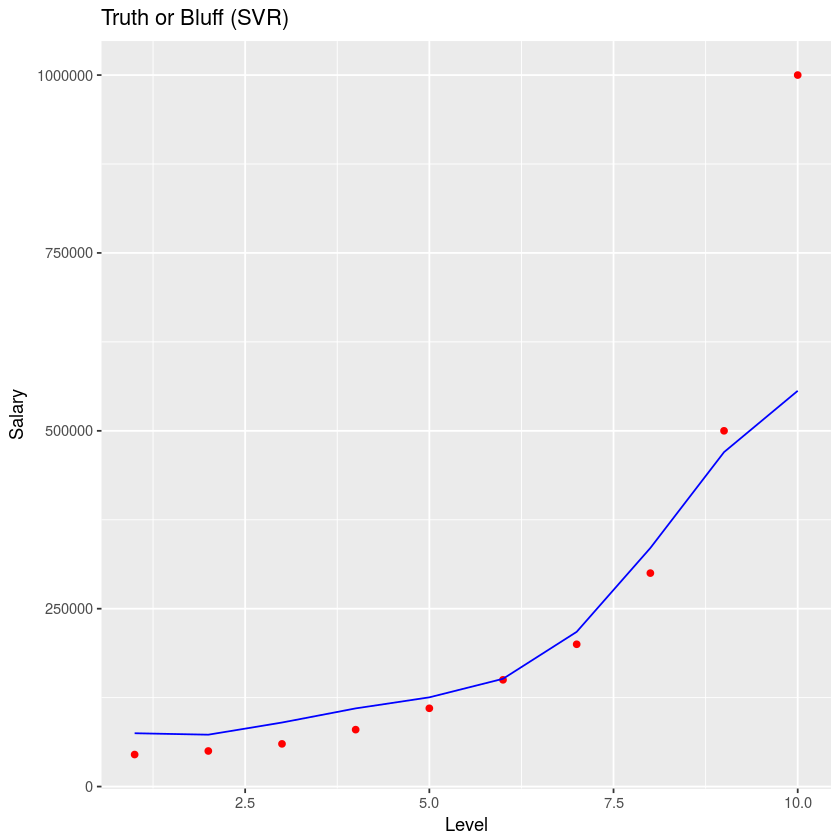

In [13]:
ggplot() +
    geom_point(aes(x=dataset$Level, y=dataset$Salary),
               color='red') +
    geom_line(aes(x=dataset$Level, y=predict(regressor, newdata=dataset)),
              color='blue') +
    ggtitle('Truth or Bluff (SVR)') +
    xlab('Level') +
    ylab('Salary')

# Decision tree regression

Intuition.

CART

* Classification trees
* Regression trees

Algorithm splits datapoints into sub parts. How splits are performed depends on algorithm. Related to `information entropy`.

How are values defined? Taking averages of values within area.

## Exercise

Need to set parameters for splits.

Discrete model, leading to funky plot.

In [15]:
library(rpart)

In [14]:
dataset = read_csv("data/Decision_Tree_Regression/Position_Salaries.csv")
dataset = dataset[2:3]
dataset

Parsed with column specification:
cols(
  Position = col_character(),
  Level = col_integer(),
  Salary = col_integer()
)


Level,Salary
1,45000
2,50000
3,60000
4,80000
5,110000
6,150000
7,200000
8,300000
9,500000
10,1000000


In [20]:
# Type - regression, classification...
regressor <- rpart(formula = Salary ~ .,
                   data = dataset,
                   control = rpart.control(minsplit=1))
y_pred <- predict(regressor, data.frame(Level = 6.5))
y_pred

1 
250000

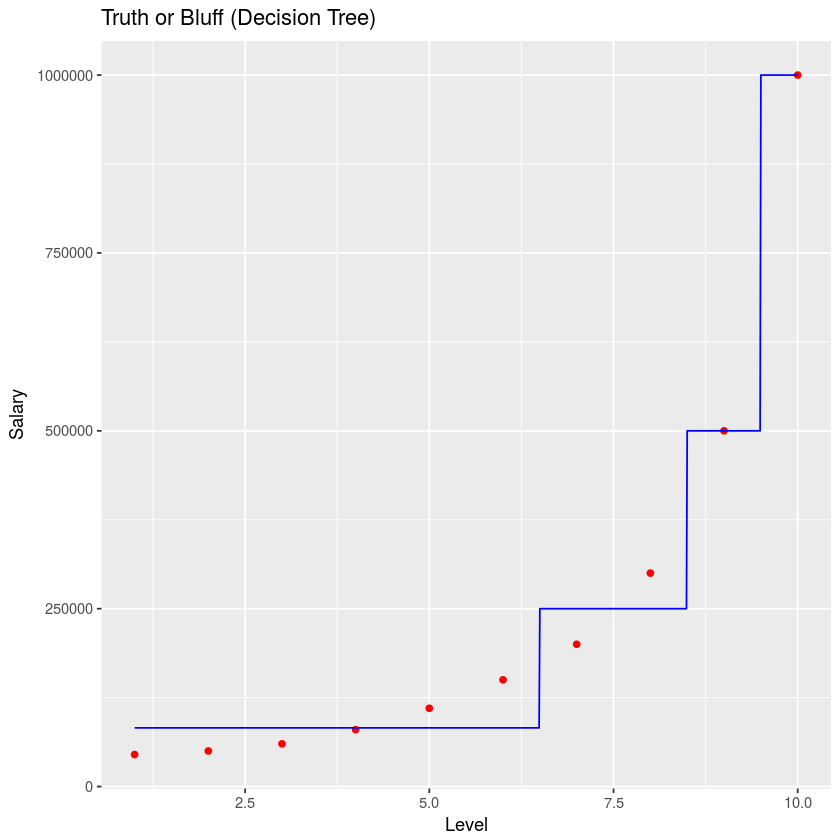

In [25]:
# Splitting in 1D. Taking average within each level.

x_grid <- seq(min(dataset$Level), max(dataset$Level), 0.01)
ggplot() +
    geom_point(aes(x=dataset$Level, y=dataset$Salary),
               color='red') +
    geom_line(aes(x=x_grid, y=predict(regressor, newdata=data.frame(Level=x_grid))),
              color='blue') +
    ggtitle('Truth or Bluff (Decision Tree)') +
    xlab('Level') +
    ylab('Salary')

# Random forest decision trees

* Pick at random K data points from training set
* Build decision tree associated to these K data points
* Choose the number Ntree trees you want to build and repeat steps 1 & 2
* For a new data point, make each one of your Ntree trees predict the value of Y for point in question, and assign new data point average across all predicted Y values

We predict a lot of trees, and then takes average. Ensemble kind of method (parallel: Guessing number of marbles in glass jar).

In [40]:
library(randomForest)
set.seed(1234)
source("~/src/JupyterRReuse/VisualizationUtils.R")

[1] "Loading module to 'visutil' and 'vu'"


In [30]:
dataset = read_csv("data/Random_Forest_Regression/Position_Salaries.csv")
dataset = dataset[2:3]
dataset

Parsed with column specification:
cols(
  Position = col_character(),
  Level = col_integer(),
  Salary = col_integer()
)


Level,Salary
1,45000
2,50000
3,60000
4,80000
5,110000
6,150000
7,200000
8,300000
9,500000
10,1000000


In [36]:
# dataset[Level] - Gives dataframe
# dataset$Salary - Gives vector


In [61]:
generate_and_plot_rand_for <- function(trees) {
    
    # Splitting in 1D. Taking average within each level.
    # Here we get numerous averages in different intervals based on how the trees split the data

    regressor <- randomForest(x = dataset[1],
                          y = dataset$Salary,
                          ntree = trees)
    y_pred <- predict(regressor, data.frame(Level = 6.5))
    y_pred

    x_grid <- seq(min(dataset$Level), max(dataset$Level), 0.01)
    plt <- ggplot() +
    geom_point(aes(x=dataset$Level, y=dataset$Salary),
               color='red') +
    geom_line(aes(x=x_grid, y=predict(regressor, newdata=data.frame(Level=x_grid))),
              color='blue') +
    ggtitle(paste('Truth or Bluff (Decision Tree), trees:', trees)) +
    xlab('Level') +
    ylab('Salary')
    return(plt)    
}

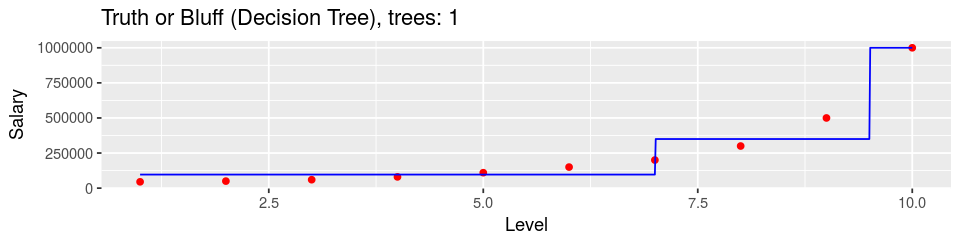

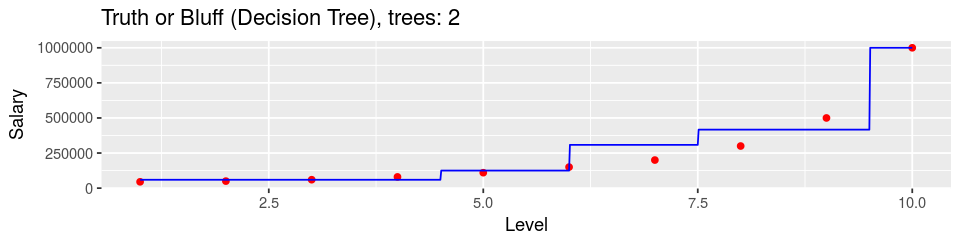

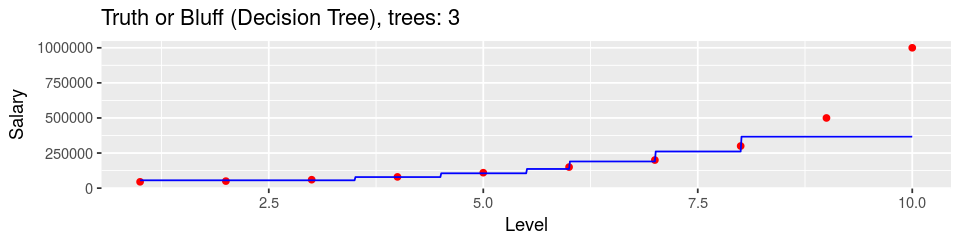

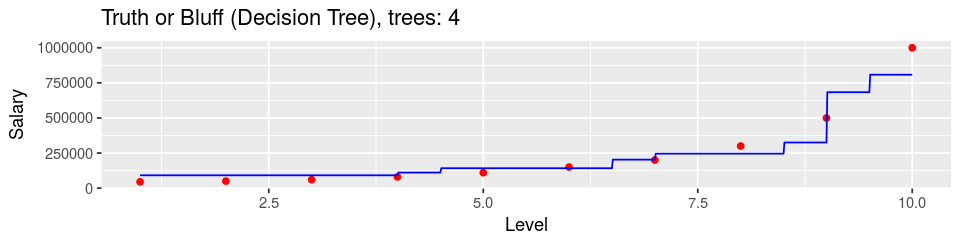

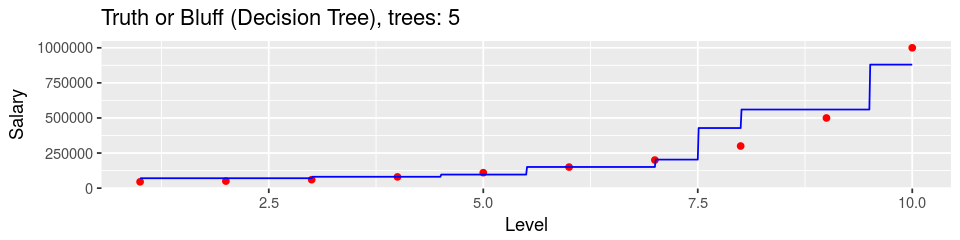

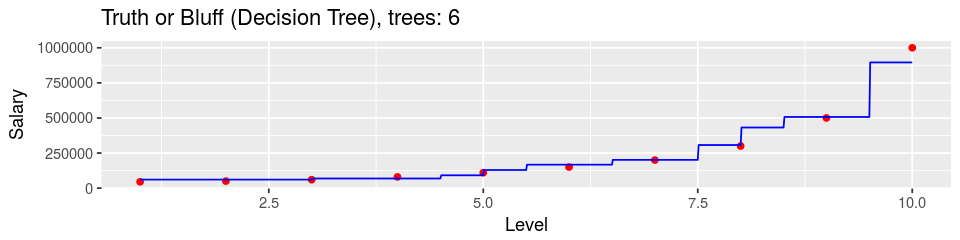

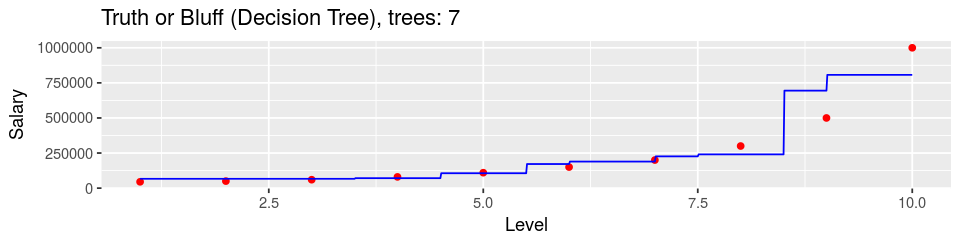

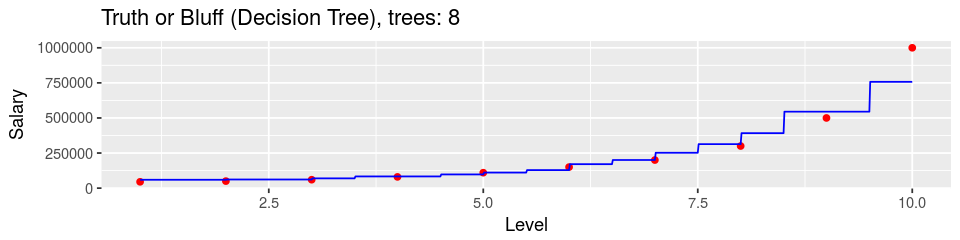

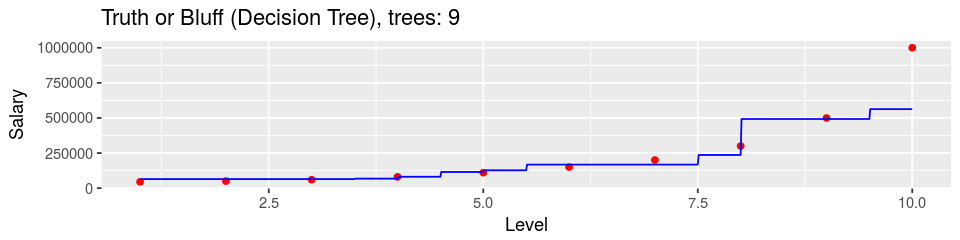

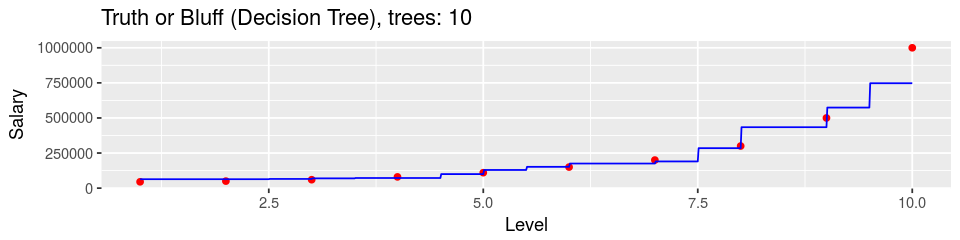

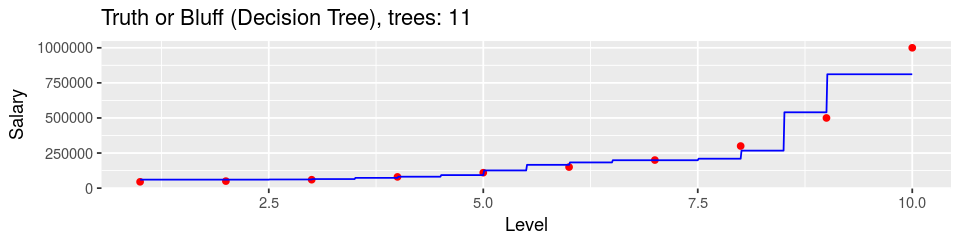

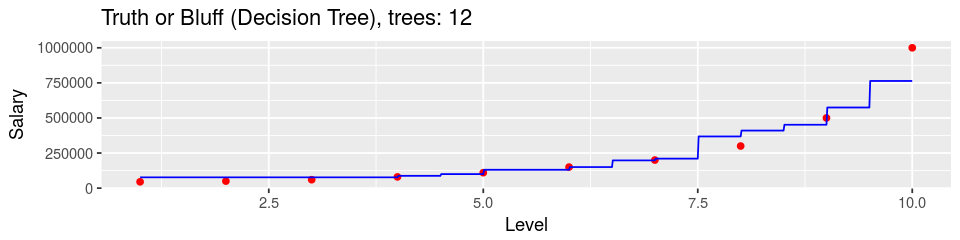

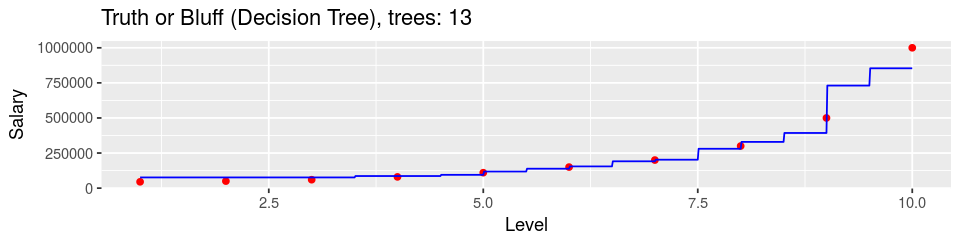

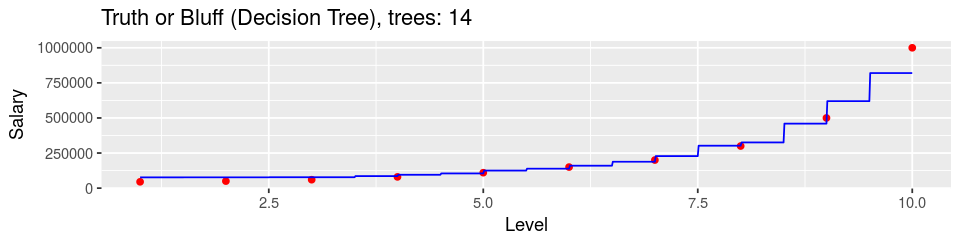

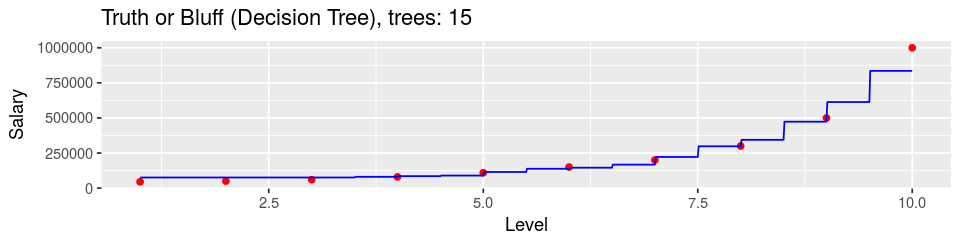

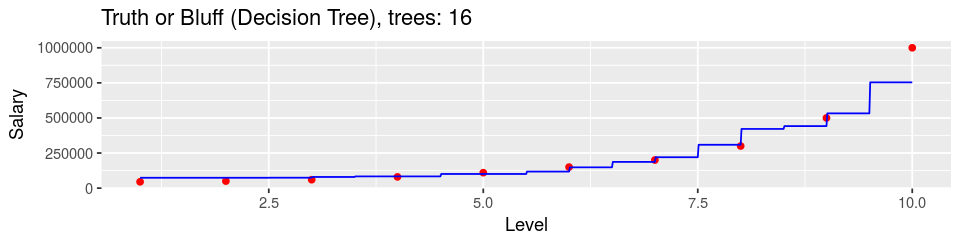

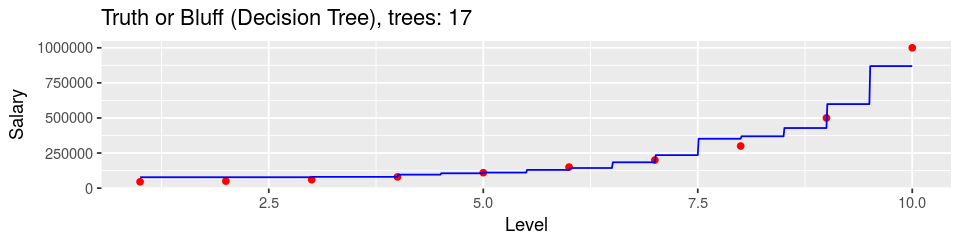

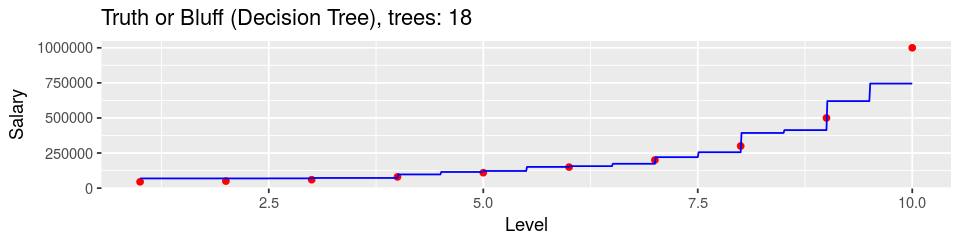

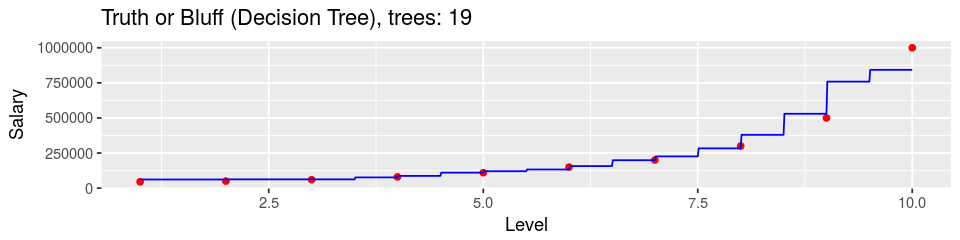

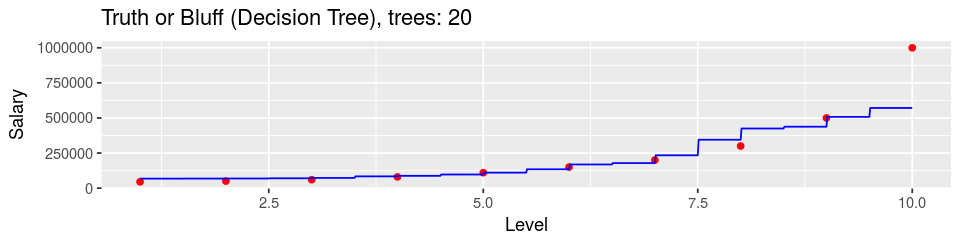

In [65]:
vu$pltsize(8, 2)
plt_list <- list()
for (trees in seq(1,20,1)) {
    print(generate_and_plot_rand_for(trees))
}

#vu$multiplot(plotlist=plt_list, cols=3)
